# GOIs PRESENCE BY SPECIES

### Imports

In [232]:
from pathlib import Path
import json
from typing import Tuple, Generator, Iterator, Callable, Any
from subprocess import Popen, PIPE


import pandas as pd
import seaborn as sns

### Helpers

In [226]:
def organize_rows(df: pd.DataFrame) -> pd.DataFrame:
    g = sns.clustermap(df, col_cluster=False)
    return g.data2d

def time_it(func: Callable) -> Callable:
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        print(f"{func.__name__} took {end - start} seconds to complete.")
        return result
    return wrapper

def head(gen: Iterator[Any], n=5) -> Generator[Any, None, None]:
    yield from islice(gen, n)

    
def run_in_shell(*args: Tuple[str, ...]) -> Generator[str, None, None]:
    process = Popen(args, stdout=PIPE, stderr=PIPE)
    yield from (line.decode('utf-8').strip() for line in process.stdout)


### Presence/Absense table

In [110]:
pres_abs_df = (
    pd.read_pickle('/home/hugo.avila/Projects/reparoma/results/ppanggolin/reps/PRES_ABS_GENUS.pkl')
)

pres_abs_df.head()

species             Klebsiella_grimontii                              \
genome_ids     GCF_000427015.1_kleoxysa2 GCF_001052235.1_ASM105223v1   
genus_clusters                                                         
Ip6VPycV_48830                     False                       False   
Ip6VPycV_49470                     False                       False   
tU8ghtab_60870                     False                       False   
Ip6VPycV_50110                     False                       False   
Ip6VPycV_50430                     False                       False   

species                                                                 \
genome_ids     GCF_001052825.1_ASM105282v1 GCF_001053665.1_ASM105366v1   
genus_clusters                                                           
Ip6VPycV_48830                       False                       False   
Ip6VPycV_49470                       False                       False   
tU8ghtab_60870                       False                       False   
Ip6VPycV_50110                       False                       False   
Ip6VPycV_50430                       False                       False   

species                                                                 \
genome_ids     GCF_001054995.1_ASM105499v1 GCF_001060405.1_ASM106040v1   
genus_clusters                                                           
Ip6VPycV_48830                       False                       False   
Ip6VPycV_49470                       False                       False   
tU8ghtab_60870                       False                       False   
Ip6VPycV_50110                       False                       False   
Ip6VPycV_50430                       False                       False   

species                                                                 \
genome_ids     GCF_001065765.1_ASM106576v1 GCF_001066775.1_ASM106677v1   
genus_clusters                                                           
Ip6VPycV_48830                       False                       False   
Ip6VPycV_49470                       False                       False   
tU8ghtab_60870                       False                       False   
Ip6VPycV_50110                       False                       False   
Ip6VPycV_50430                       False                       False   

species                                                                 ...  \
genome_ids     GCF_001070955.1_ASM107095v1 GCF_001072735.1_ASM107273v1  ...   
genus_clusters                                                          ...   
Ip6VPycV_48830                       False                       False  ...   
Ip6VPycV_49470                       False                       False  ...   
tU8ghtab_60870                       False                       False  ...   
Ip6VPycV_50110                       False                       False  ...   
Ip6VPycV_50430                       False                       False  ...   

species        Klebsiella_variicola                                          \
genome_ids                573.13358 573.13419 573.13484 573.13647 573.13649   
genus_clusters                                                                
Ip6VPycV_48830                False     False     False     False     False   
Ip6VPycV_49470                False     False     False     False     False   
tU8ghtab_60870                 True     False     False     False     False   
Ip6VPycV_50110                False     False     False     False     False   
Ip6VPycV_50430                 True     False     False     False     False   

species                                                           
genome_ids     573.14059 573.14170 573.14328 573.14387 573.14410  
genus_clusters                                                    
Ip6VPycV_48830     False     False     False     False     False  
Ip6VPycV_49470     False     False     False     False     False  
tU8ghtab_60870     False     False     Fals

# Resistome and Virulome

### Abricate data (Virulome and Resistome)

In [141]:
abricate_virulome = '/home/hugo.avila/Projects/reparoma/results/GOIs/vfdb.tsv'
abricate_resistome = '/home/hugo.avila/Projects/reparoma/results/GOIs/card.tsv'

def translate_abricate_resistence(resistance_profile: str, separator=';') -> str:
    bra_antib_names = {
        "fluoroquinolone": "fluoroquinolona",
        "carbapenem": "carbapenêm",
        "cephalosporin": "cefalosporina",
        "penam": "penâm",
        "aminoglycoside": "aminoglicosídeo",
        "aminocoumarin": "aminocumarina",
        "diaminopyrimidine": "diaminopirimidina",
        "macrolide": "macrolídeo",
        "peptide": "peptídeo",
        "rifamycin": "rifamicina",
        "tetracycline": "tetraciclina",
        "penem": "penêm",
        "glycopeptide": "glicopeptídeo",
        "cephamycin": "cefamicina",
        "lincosamide": "lincosamida",
        "phenicol": "fenicol",
        "sulfonamide": "sulfonamida",
        "glycylcycline": "glicilciclina",
        "nitrofuran": "nitrofurano",
        "monobactam": "monobactâm",
        "triclosan": "triclosano",
        "fosfomycin": "fosfomicina",
        "streptogramin": "estreptogramina",
        "nucleoside": "nucleosídeo",
        "oxazolidinone": "oxazolidinona",
        "pleuromutilin": "pleuromutilina",
        "nitroimidazole": "nitroimidazol"
    }
    try:
        return (
            f'{separator} '
            .join(
                map(
                    lambda antibiotic: bra_antib_names.get(antibiotic, '').capitalize(),
                    resistance_profile.split(';')
                )
            )
        )
    except AttributeError:
        pass

abricate_results = (
    # Reading and merging the tables
    pd.concat(
        map(
            lambda fn: pd.read_csv(fn, sep='\t'),
            [abricate_resistome, abricate_virulome]
        ),
        ignore_index=True
    )
    # Translating names
    .assign(
        RESISTANCE = lambda df_: df_.RESISTANCE.apply(translate_abricate_resistence)
    )
    # Filtering for coverage and identity
    .loc[lambda df_: df_['%COVERAGE'].ge(80) & df_['%IDENTITY'].ge(50)]
    # Keeping the high scoring match 
    .groupby(['DATABASE', 'SEQUENCE'], as_index=False)
    .apply(pd.DataFrame.head, n=1)
    # Keeping only the wanted columns
    .loc[:, [
        'DATABASE',
        'GENE',
        'SEQUENCE',
        'ACCESSION',
        'RESISTANCE'
    ]]
    .reset_index(drop=True)
)

abricate_results.head()

,DATABASE,GENE,SEQUENCE,ACCESSION,RESISTANCE
0,card,ANT(3'')-Ii-AAC(6')-IId_fusion_protein,0mNc1Rd9_49350,AF453998:3554-4946,Aminoglicosídeo
1,card,mdtB,0oa37Bwq_58190,U00096:2155262-2158385,Aminocumarina
2,card,dfrA14,0rFSOPAb_52960,EU780012:2162-2645,Diaminopirimidina
3,card,AAC(6')-Ia,1jqtclVT_55020,M18967:756-1314,Aminoglicosídeo
4,card,APH(4)-Ia,22LlKmzz_19030,V01499:230-1256,Aminoglicosídeo


### Get perc of the presence and absence of the matching clusters 

In [148]:
perc_pres_abs_abricate = (
    pres_abs_df
    .pipe(
        lambda df_: (
            df_.groupby('species', axis=1)
            .sum()
            .groupby('species', axis=1)
            .apply(lambda gdf_: gdf_[gdf_.name] /  df_.iloc[0].groupby('species').size().to_dict()[gdf_.name])
        )
    )
)

perc_pres_abs_abricate.head()

species,Klebsiella_grimontii,Klebsiella_michiganensis,Klebsiella_oxytoca,Klebsiella_pasteurii,Klebsiella_pneumoniae,Klebsiella_quasipneumoniae,Klebsiella_variicola
genus_clusters,,,,,,,
Ip6VPycV_48830,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.005282
Ip6VPycV_49470,0.0,0.000000,0.000000,0.0,0.000000,0.052161,0.008803
tU8ghtab_60870,0.0,0.002985,0.009434,0.0,0.005747,0.020864,0.137324
Ip6VPycV_50110,0.0,0.000000,0.000000,0.0,0.002579,0.013413,0.007042
Ip6VPycV_50430,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.010563


### Add the relative abundance to the abricate results table

,DATABASE,SEQUENCE,GENE,ACCESSION,RESISTANCE,Klebsiella_grimontii,Klebsiella_michiganensis,Klebsiella_oxytoca,Klebsiella_pasteurii,Klebsiella_pneumoniae,Klebsiella_quasipneumoniae,Klebsiella_variicola
0,card,8ArueQV0_60800,SIM-1_beta-lactamase,GQ288397:0-741,Carbapenêm; Cefalosporina; Penâm,0.0,0.002985,0.0,0.0,0.000000,0.001490,0.0
1,card,UF2G5Kzi_58400,VEB-3,AY536519:37-937,Cefalosporina; Monobactâm,0.0,0.005970,0.0,0.0,0.004789,0.011923,0.0
2,card,JIlDdoXm_39870,linG,DQ836009.1:1309-2131,Lincosamida,0.0,0.005970,0.0,0.0,0.001547,0.001490,0.0
3,card,UvZwA2AK_60540,dfrA3b,AY162283.2:5615-6095,Diaminopirimidina,0.0,0.002985,0.0,0.0,0.000074,0.000000,0.0
4,card,uIW1a48N_54440,TLA-3,AP014611.1:150153-149223,Cefalosporina; Fluoroquinolona; Monobactâm,0.0,0.002985,0.0,0.0,0.000000,0.000000,0.0


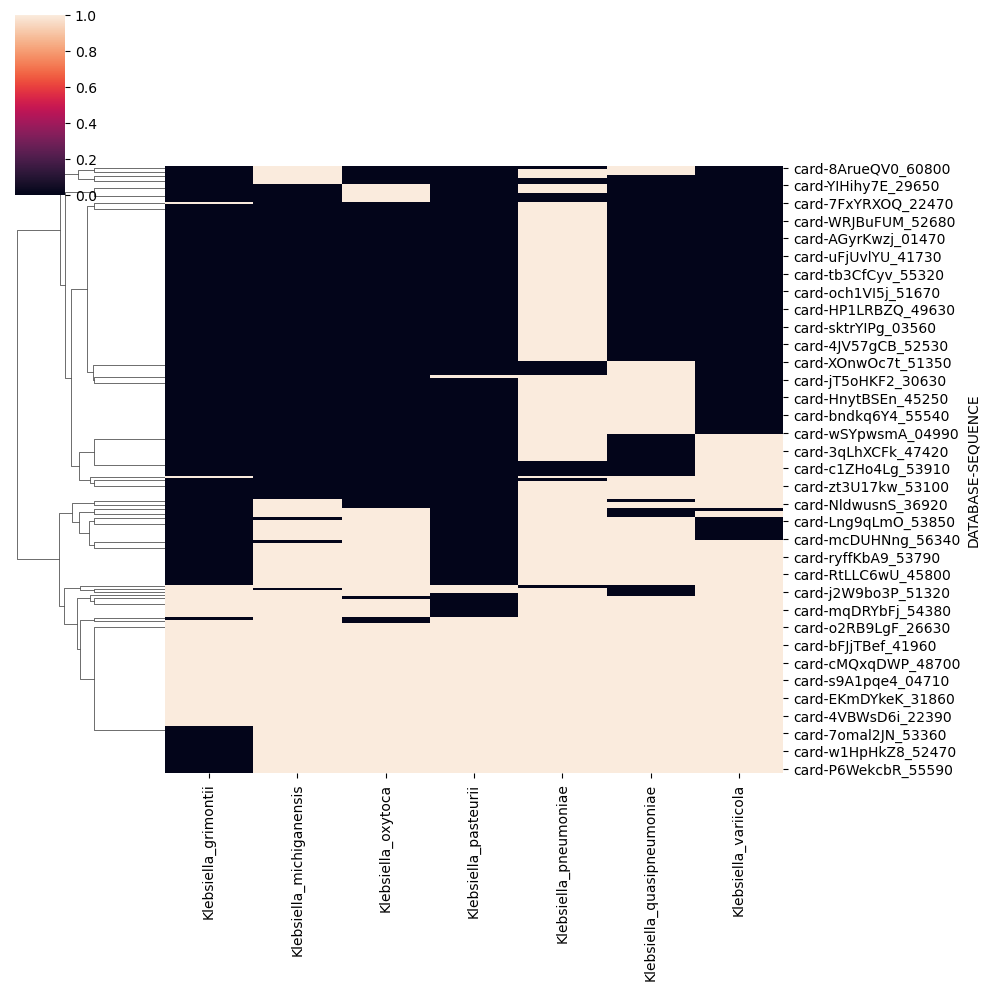

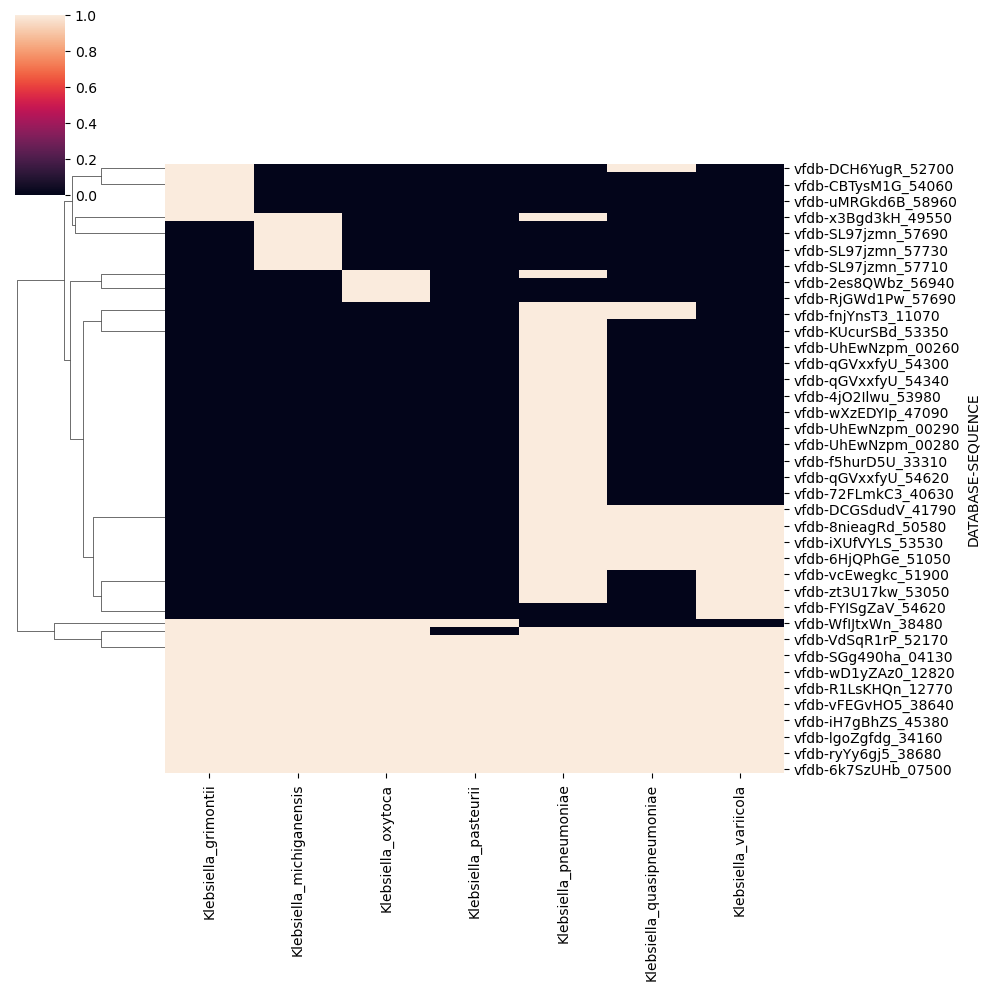

In [220]:
abricate_print_table = (
    abricate_results
    # add to each database at a time
    .groupby('DATABASE', as_index=False)
    .apply(
        lambda df_: (
            df_.merge(
                perc_pres_abs_abricate,
                left_on='SEQUENCE',
                right_on='genus_clusters',
                validate='1:1'
            )
            .sort_values('GENE')
        )
    )
    .set_index(['DATABASE', 'SEQUENCE'], drop=True)
    # Organize the rows by HA clustering
    .groupby(['DATABASE'])
    .apply(
        lambda df_: (
            df_
            .loc[:, lambda df_: df_.columns.to_series().str.startswith('K').values]
            .applymap(bool)
            .applymap(int)
            .pipe(organize_rows)
            .index
            .get_level_values('SEQUENCE')
            .to_frame()
            .reset_index(drop=True)
            .merge(
                df_,
                on='SEQUENCE',
                validate='1:1'
            )
        )
    )
    .reset_index()
    .drop('level_1', axis=1)
)

# Write to a file
(
    abricate_print_table
    .to_csv(
        '/home/hugo.avila/Projects/reparoma/results/GOIs/abricate/ABRICATE.tsv',
        index=False,
        sep='\t',
        float_format='%.15f',
        decimal=','
    )
)

abricate_print_table.head()

# Reparome

### Readin the Kegg ko03400 sub classes

In [233]:
def expand_kegg_record(json_obj):
    paths = []
    def dfs(node, path):
        if not node.get("children"):
            paths.append(path + [node["name"]])
            return
        for child in node["children"]:
            dfs(child, path + [node["name"]])
    dfs(json_obj, [])
    return paths

recs = expand_kegg_record(json.loads('\n'.join(run_in_shell('cat', '/home/hugo.avila/Projects/reparoma/data/reparoma/kegg/ko03400.json')))['children'][1])

kegg_KO_proka = (
    pd.DataFrame([ rec + ([None] * (6 - len(recs))) for rec in recs ])
    .iloc[:, 1:]
    .fillna('')
    .assign(
        KO = lambda df_: df_.apply(lambda x: tuple(filter(lambda y: y.startswith('K'), x))[0], axis=1),
        cats = lambda df_: df_.apply(lambda x: list(filter(lambda y: not y.startswith('K'), x)), axis=1),
    )
    .loc[:, ['cats', 'KO']]
    .pipe(lambda df_: pd.concat((pd.DataFrame(df_.cats.values.tolist()), df_.KO), axis=1, ignore_index=True) )
    .assign(
        KO = lambda df_: df_[4].str.split().str[0],
        name = lambda df_: df_[4].str.split(';').str[0].str.split().apply(lambda x: ' '.join(x[1:])),
        description = lambda df_: df_[4].str.split(';').str[1],
        categorie = lambda df_: df_.loc[:, :3].agg('; '.join, axis=1)
    )
    .loc[:, lambda df_: ~df_.columns.to_series().str.isdigit().apply(bool) ]
)

kegg_KO_proka

,KO,name,description,categorie
0,K00567,"ogt, MGMT",methylated-DNA-[protein]-cysteine S-methyltra...,SSBR (single strand breaks repair); Direct rep...
1,K10778,ada,"AraC family transcriptional regulator, regula...",SSBR (single strand breaks repair); Direct rep...
2,K13530,adaA,"AraC family transcriptional regulator, regula...",SSBR (single strand breaks repair); Direct rep...
3,K13531,adaB,methylated-DNA-[protein]-cysteine S-methyltra...,SSBR (single strand breaks repair); Direct rep...
4,K01669,"phr, PHR1",deoxyribodipyrimidine photo-lyase [EC:4.1.99.3],SSBR (single strand breaks repair); Direct rep...
...,...,...,...,...
152,K01520,"dut, DUT",dUTP pyrophosphatase [EC:3.6.1.23],Other factors with a suspected DNA repair func...
153,K00525,"E1.17.4.1A, nrdA, nrdE",ribonucleoside-diphosphate reductase alpha ch...,Other factors with a suspected DNA repair func...
154,K00526,"E1.17.4.1B, nrdB, nrdF",ribonucleoside-diphosphate reductase beta cha...,Other factors with a suspected DNA repair func...
155,K06881,nrnA,bifunctional oligoribonuclease and PAP phosph...,Other factors with a suspected DNA repair func...


### Reading Kofam results 

In [235]:
kofamkoala_results = (
    # Reading the results table
    pd.read_csv(
        '/home/hugo.avila/Projects/reparoma/results/GOIs/reparome/kofamkoala.tsv',
        sep='\t',
        header=None,
        names=('locus_tag', 'KO')
    )
    # Getting only the matchs within ko03400
    .loc[lambda df_: df_.KO.isin(kegg_KO_proka.KO)]
)

kofamkoala_results.head()

,locus_tag,KO
0,00SnrgcH_46610,K03701
1,00oLeWUr_30690,K05984
2,03Ohzhgj_10620,K03502
3,03Ohzhgj_27860,K03724
5,0CF6qbmi_49810,K03746


In [257]:
perc_pres_abs_reparome = (
    pres_abs_df
    .loc[lambda df_: df_.index.isin(kofamkoala_results.locus_tag)]
    .pipe(
        lambda df_: (
            df_.groupby('species', axis=1)
            .sum()
            .groupby('species', axis=1)
            .apply(lambda gdf_: gdf_[gdf_.name] /  df_.iloc[0].groupby('species').size().to_dict()[gdf_.name])
        )
    )
)

perc_pres_abs_reparome.head()

species,Klebsiella_grimontii,Klebsiella_michiganensis,Klebsiella_oxytoca,Klebsiella_pasteurii,Klebsiella_pneumoniae,Klebsiella_quasipneumoniae,Klebsiella_variicola
genus_clusters,,,,,,,
r4WE3k6E_23700,0.000000,0.000000,0.000000,0.000000,0.997421,1.000000,0.996479
ebffPcMY_39430,1.000000,1.000000,1.000000,1.000000,0.999779,1.000000,0.998239
q1XgciBx_30530,0.000000,0.002985,0.000000,0.000000,0.004494,0.004471,0.001761
2Y2KCq6A_00810,0.030864,0.011940,0.028302,0.054054,0.130480,0.017884,0.003521
7FAfyIu6_12890,0.000000,0.167164,0.000000,0.000000,0.046268,0.002981,0.022887


### Merging the data to get the print table

,KO,name,Klebsiella_grimontii,Klebsiella_michiganensis,Klebsiella_oxytoca,Klebsiella_pasteurii,Klebsiella_pneumoniae,Klebsiella_quasipneumoniae,Klebsiella_variicola
clusters_representative,,,,,,,,,
LgvwU9XF_48200,K15342,cas1,0.388889,0.098507,0.000000,0.027027,0.117218,0.0,0.128521
pVzEgwAJ_16950,K03746,hns,0.000000,0.002985,0.000000,0.027027,0.001252,0.0,0.001761
D05vWrHS_36350,K03502,umuC,0.006173,0.000000,0.000000,0.000000,0.000074,0.0,0.991197
YwktIJYE_57320,K06223,dam,0.012346,0.000000,0.009434,0.000000,0.000147,0.0,0.003521
g1RvnjlC_43770,K10906,recE,0.049383,0.000000,0.000000,0.027027,0.000000,0.0,0.003521


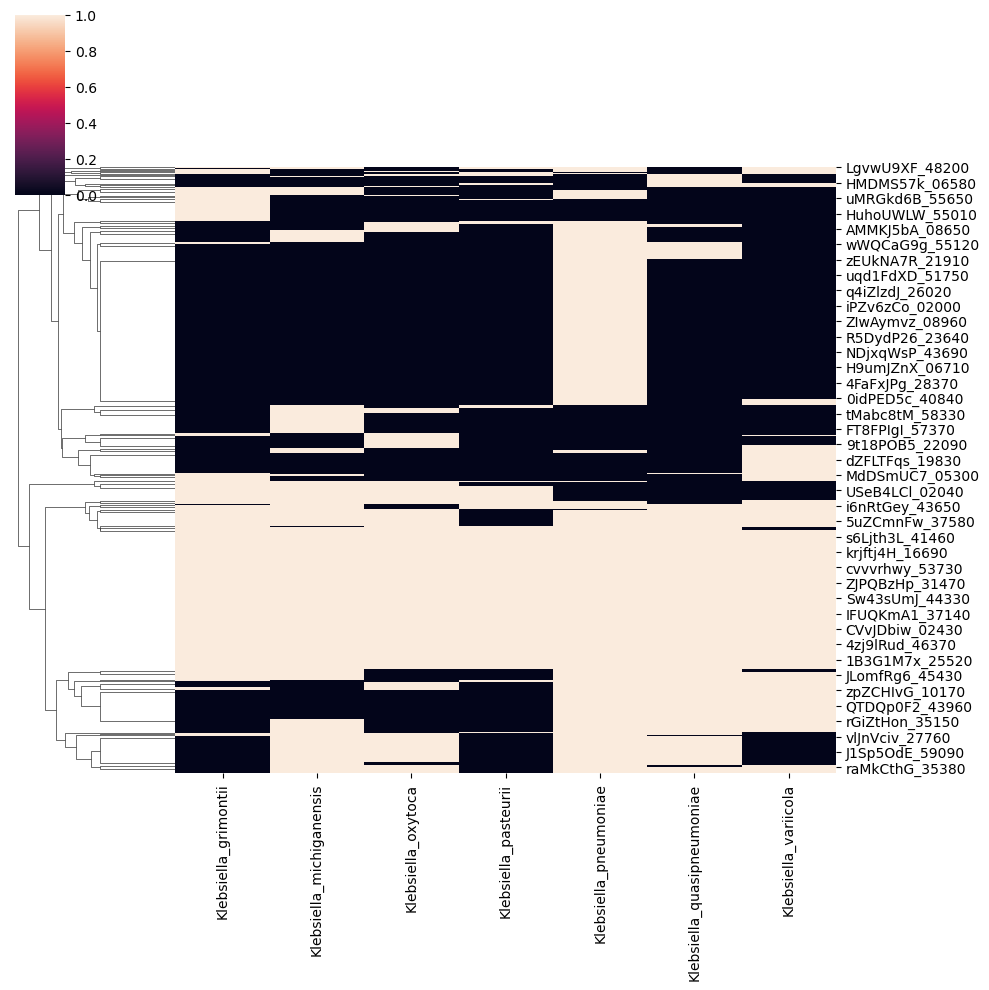

In [325]:
reparome_print_table  = (
    kofamkoala_results
    .merge(
        kegg_KO_proka,
        on='KO'
    )
    .groupby('locus_tag')
    .agg(lambda series_: '; '.join(set(series_)))
    .drop(['categorie', 'description'], axis=1)
    .merge(
        perc_pres_abs_reparome,
        left_index=True,
        right_index=True,
        validate='1:1'
    )
    .pipe(
        lambda df_: (
            df_
            .loc[:, lambda df_: df_.columns.to_series().str.startswith('Kleb').values]
            .applymap(bool)
            .applymap(int)
            .pipe(organize_rows)
            .index
            .to_frame()
            .merge(
                df_,
                left_index=True,
                right_index=True,
                validate='1:1'
            )
            .drop(0, axis=1)
            .rename_axis('clusters_representative')
        )
    )
)


reparome_print_table.head()

In [327]:
# Write to a file
(
    reparome_print_table
    .to_csv(
        '/home/hugo.avila/Projects/reparoma/results/GOIs/reparome/REPAROME.tsv',
        sep='\t',
        float_format='%.15f',
        decimal=','
    )
)
